# Long Term Market Index Regression to the mean

**Background**

One of the oldest attempts to predict market returns in recent history is to be traced back to **Charles H. Dow** (1851–1902), who with Edward Jones and Charles Bergstresser, founded Dow Jones & Company, Inc. and in 1896 developed the Dow Jones Industrial Average and the Dow Jones Transportation Average to track the moves of the economy and help him make money trading stocks.

The theory was derived from 255 editorials he wrote in The Wall Street Journal, of which he was founder and first editor. Following Dow's death, William Peter Hamilton, Robert Rhea and E. George Schaefer organized and collectively represented **Dow theory**, based on Dow's editorials.

One of the most well known Dow theorists, until his death in 2015, was **Richard Russel** (1924-2015), who began publishing the **Dow Theory Letters** in 1958 until his death, making his 3-weekly newsletter oldest service continuously written by one person in the business.

Russell gained wide recognition via a series of over 30 Dow Theory and technical articles that he wrote for Barron's during the late-'50s through the '90s. Through Barron's and via word of mouth, he gained a wide following. Russell was the first (in 1960) to recommend gold stocks. He called the top of the 1949-'66 bull market. And almost to the day he called the bottom of the great 1972-'74 bear market, and the beginning of the great bull market which started in December 1974.

In one of his letters dated back to early 2006, Russel wrote:

*''Over a short span, the markets can do anything, and anything can happen [...] Over an extended period of time, and I'm talking years - 2 plus 2 has always equalled 4. The surest rule in the stock market is the rule ... called **regression to the mean**.''*

**Rationale**

Considering the market turmoil we have been facing in the post-Covid world, and keeping in mind the words of Russel, the aim of this little project is to forecast the fair value of a market index, putting it in perspective with its long term performance, in other words perform a *LAZY* Fair Value forecast based on a simple Linear Regression model.
   

### 1. Import Libriaries

In [229]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression 

### 2. Tickers Selection

Market indeces used for the anlysis will be i) Nasdaq 100, ii) S&P 500, iii) Dow Jones Industrial Average and iv) Russel 2000. Price data will be collected from Yahoo Finance

In [230]:
tickers = ['^GSPC','NDX','^DJI','^RUT']
names = ['S&P 500','Nasdaq','Dow Jones Industrial Average','Russel 2000']

### 3. Import Data

In [231]:
dataset = pdr.DataReader(tickers,data_source='yahoo',start='01/01-1900').Close

### 4. Data Analaysis

In [232]:
dataset.head()

Symbols,^GSPC,NDX,^DJI,^RUT
Date,,,,
1927-12-30,17.660000,NaN,NaN,NaN
1928-01-03,17.760000,NaN,NaN,NaN
1928-01-04,17.719999,NaN,NaN,NaN
1928-01-05,17.549999,NaN,NaN,NaN
1928-01-06,17.660000,NaN,NaN,NaN


In [233]:
dataset.tail()

Symbols,^GSPC,NDX,^DJI,^RUT
Date,,,,
2022-10-27,3807.300049,11191.629883,32033.279297,1806.319946
2022-10-28,3901.060059,11546.209961,32861.800781,1846.920044
2022-10-31,3871.979980,11405.570312,32732.949219,1846.859985
2022-11-01,3856.100098,11288.950195,32653.199219,1851.390015
2022-11-02,3759.689941,10906.339844,32147.759766,1789.140015


In [234]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23825 entries, 1927-12-30 to 2022-11-02
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   23825 non-null  float64
 1   NDX     9350 non-null   float64
 2   ^DJI    7769 non-null   float64
 3   ^RUT    8859 non-null   float64
dtypes: float64(4)
memory usage: 930.7 KB


In [235]:
first_valid_date = {dataset[ticker].first_valid_index() for ticker in tickers}
list(zip(names,first_valid_date))

[('S&P 500', Timestamp('1927-12-30 00:00:00')),
 ('Nasdaq', Timestamp('1985-10-01 00:00:00')),
 ('Dow Jones Industrial Average', Timestamp('1992-01-02 00:00:00')),
 ('Russel 2000', Timestamp('1987-09-10 00:00:00'))]

Data availability on Yahoo Finance of the different indices vary substantially, spanning from the S&P 500 being available since December 1927 to the Dow Jones Industrial Average being available only from January 1992

### 5. Data Preparation

In [236]:
dataset_log = np.log(dataset)
dataset_log.tail()

Symbols,^GSPC,NDX,^DJI,^RUT
Date,,,,
2022-10-27,8.244676,9.322921,10.374531,7.499047
2022-10-28,8.269004,9.354113,10.400066,7.521275
2022-10-31,8.261521,9.341857,10.396137,7.521242
2022-11-01,8.257412,9.331580,10.393698,7.523692
2022-11-02,8.232092,9.297100,10.378098,7.489490


### 6. Data Plotting

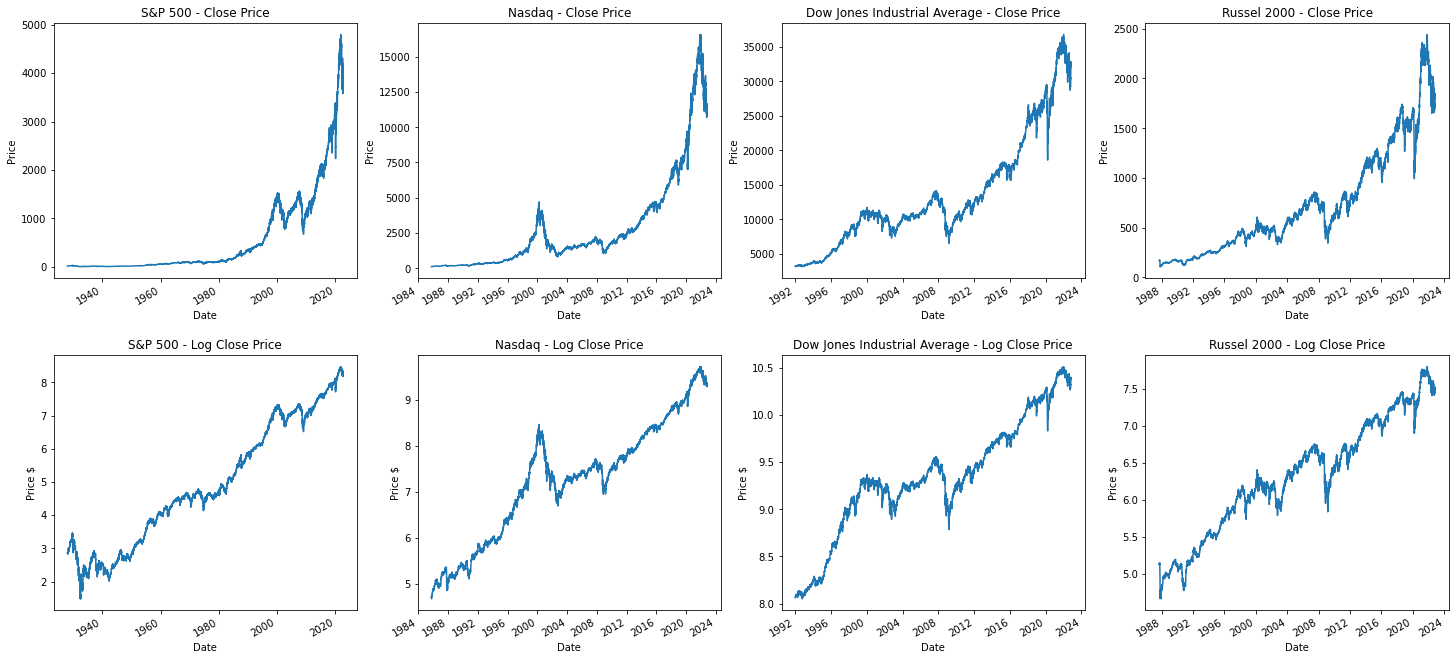

In [237]:
i = 1
plt.figure(figsize=(25,12))
for ticker in tickers:
    plt.subplot(2,4,i)
    dataset[ticker].plot()
    plt.title(f'{names[i-1]} - Close Price')
    plt.ylabel('Price')

    plt.subplots_adjust(hspace=0.3)
        
    plt.subplot(2,4,i+4)
    dataset_log[ticker].plot()
    plt.title(f'{names[i-1]} - Log Close Price')
    plt.ylabel('Price $')
    i += 1

All four market indices show a clear exponential trend over time, which doesn't fit a Linear Regression approach, Log prices of the four time series are therefore calculated

### 7. OLS Regression

In [238]:
#TBC

### 8. Valuation